In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.pyplot import figure

In [2]:
#importing dataframes
base_location = r'C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/'
tickers = ['AAPL','MSFT','AMZN','GOOG','FB','IBM','DIS','NFLX','CMCSA','ORCL','CERN','VZ']
dataframes_dict = {}
for ticker in tickers:
    temp = pd.read_csv(base_location+ticker+'/'+ticker+'.csv',parse_dates=['Date'],index_col='Date')
    #temp.index = pd.DatwraetimeIndex(temp.index).to_period('D')
    dataframes_dict[ticker] = temp


In [3]:
dataframes_dict['AAPL'].info()
dataframes_dict['MSFT'].info()
dataframes_dict['AMZN'].info()
dataframes_dict['GOOG'].info()
dataframes_dict['FB'].info()
dataframes_dict['IBM'].info()
dataframes_dict['DIS'].info()
dataframes_dict['NFLX'].info()
dataframes_dict['CMCSA'].info()
dataframes_dict['ORCL'].info()
dataframes_dict['CERN'].info()
dataframes_dict['VZ'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6193 entries, 1996-01-02 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6193 non-null   float64
 1   High       6193 non-null   float64
 2   Low        6193 non-null   float64
 3   Close      6193 non-null   float64
 4   Adj Close  6193 non-null   float64
 5   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 338.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6191 entries, 1996-01-02 to 2020-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6191 non-null   float64
 1   High       6191 non-null   float64
 2   Low        6191 non-null   float64
 3   Close      6191 non-null   float64
 4   Adj Close  6191 non-null   float64
 5   Volume     6191 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 338.6 KB
<class '

In [4]:
#setting date range on dataframes

#for ticker in tickers:
    #dataframes_dict[ticker] = dataframes_dict[ticker]['2017-01-01':'2017-12-31']


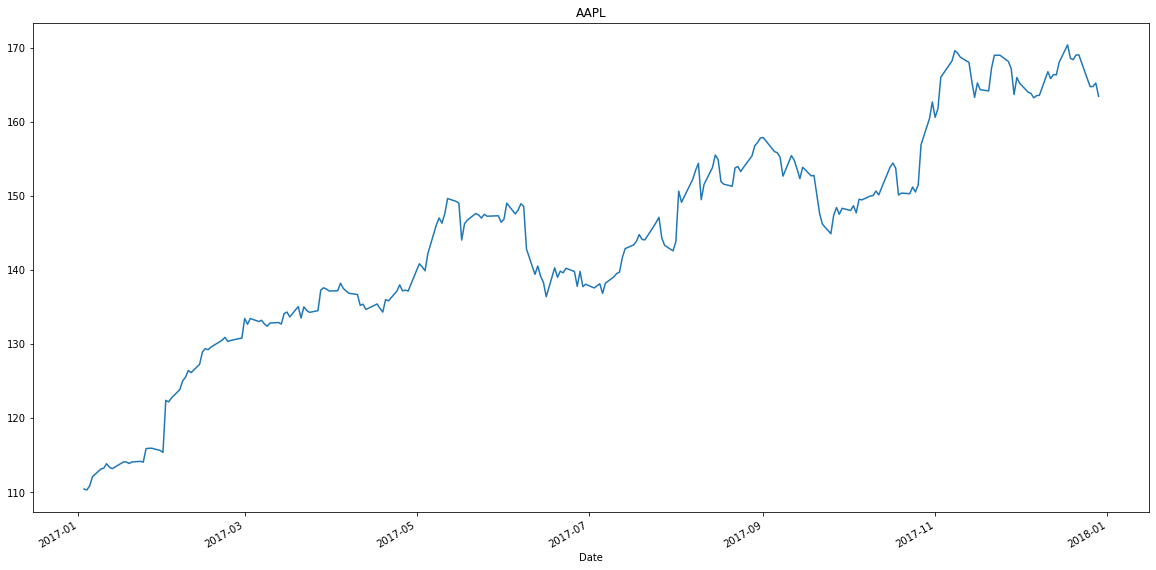

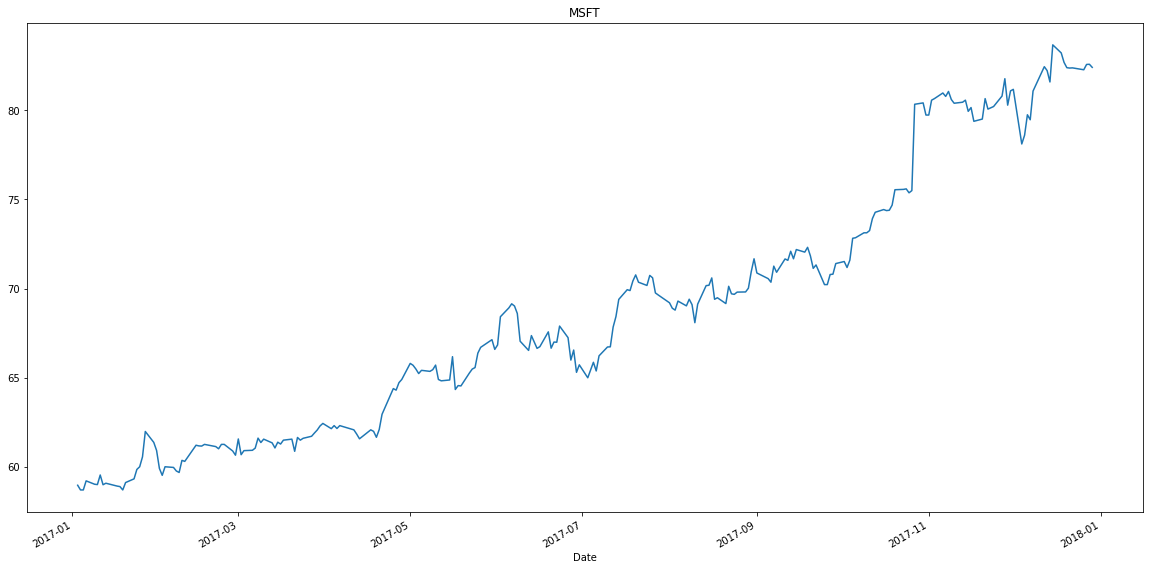

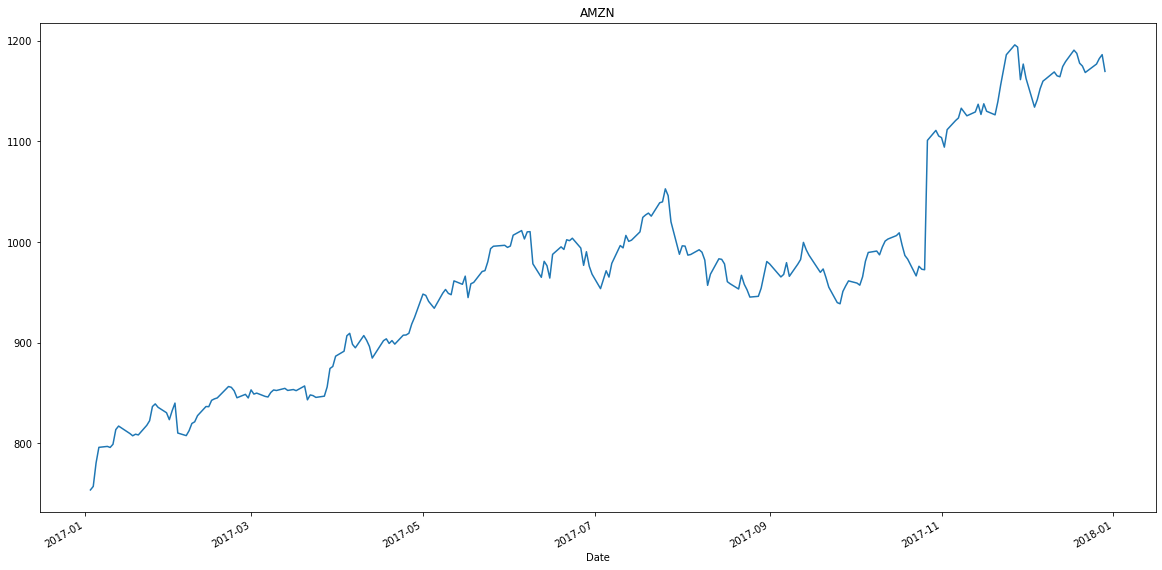

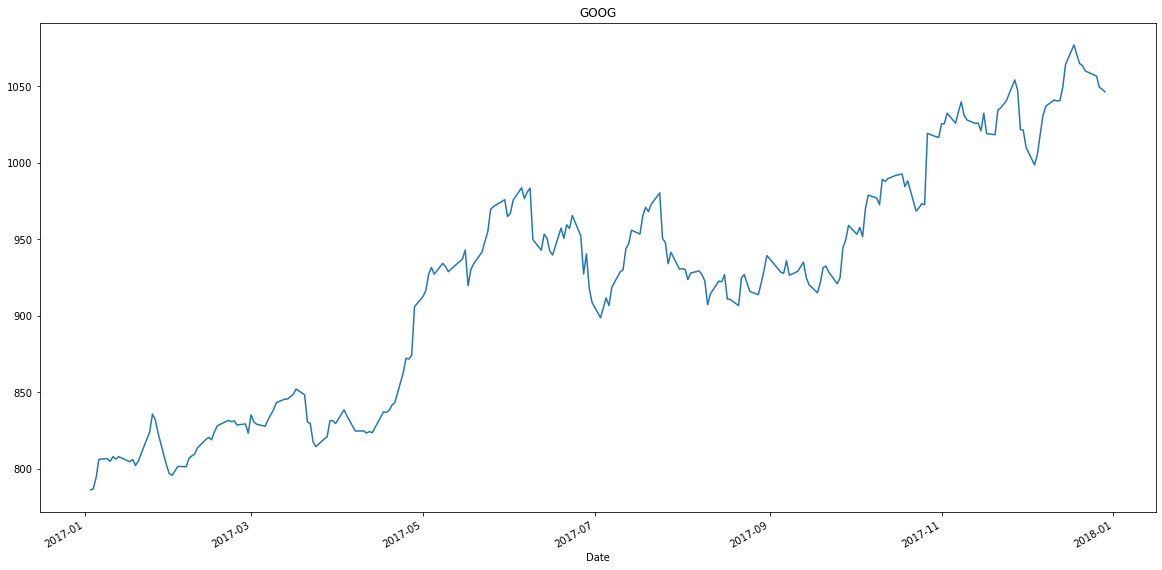

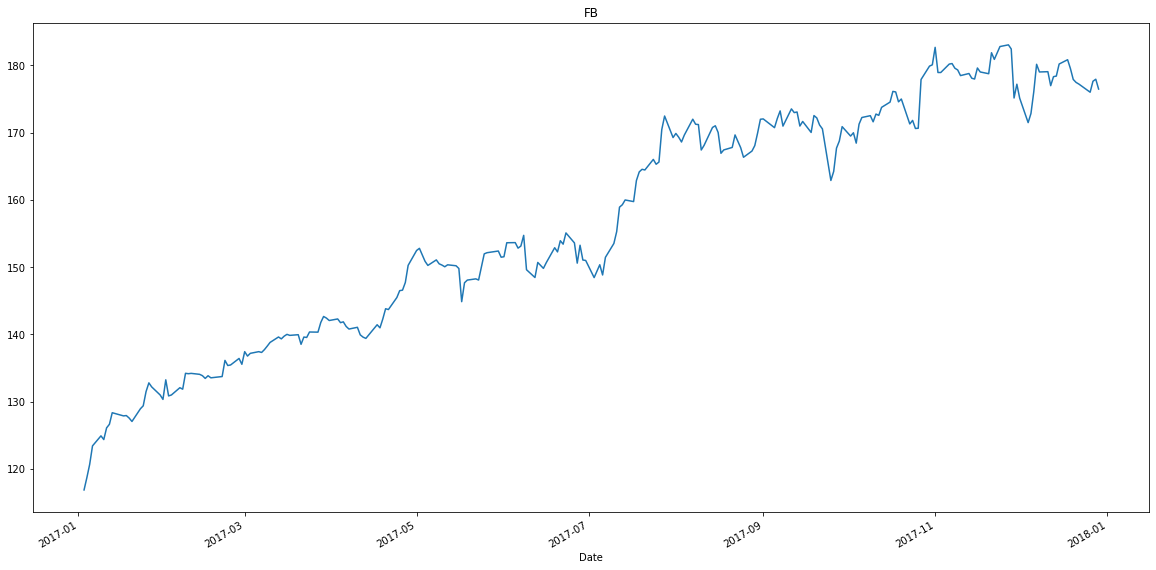

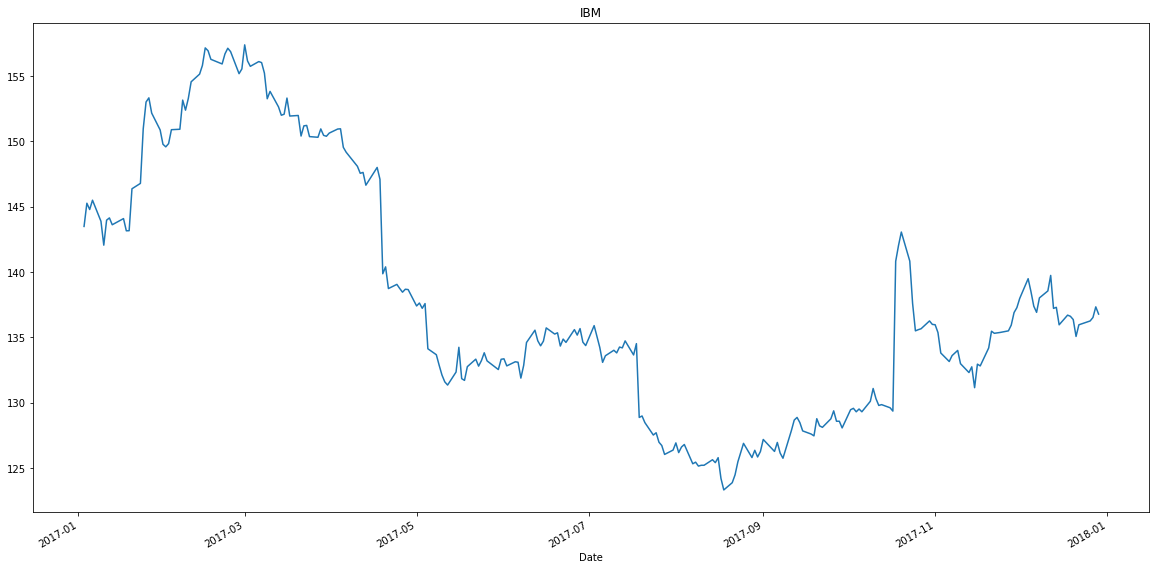

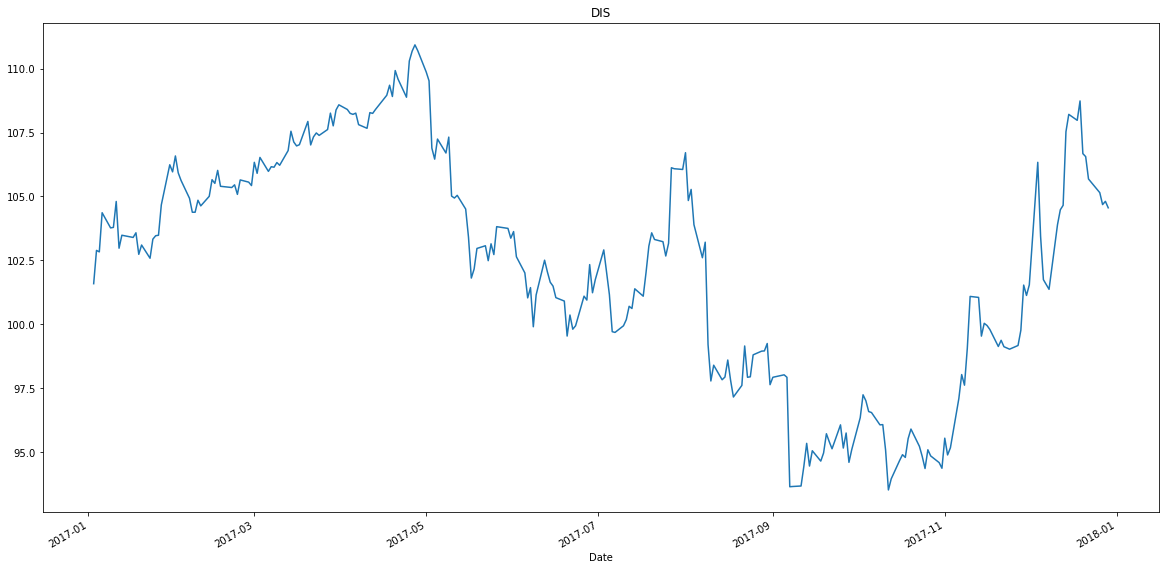

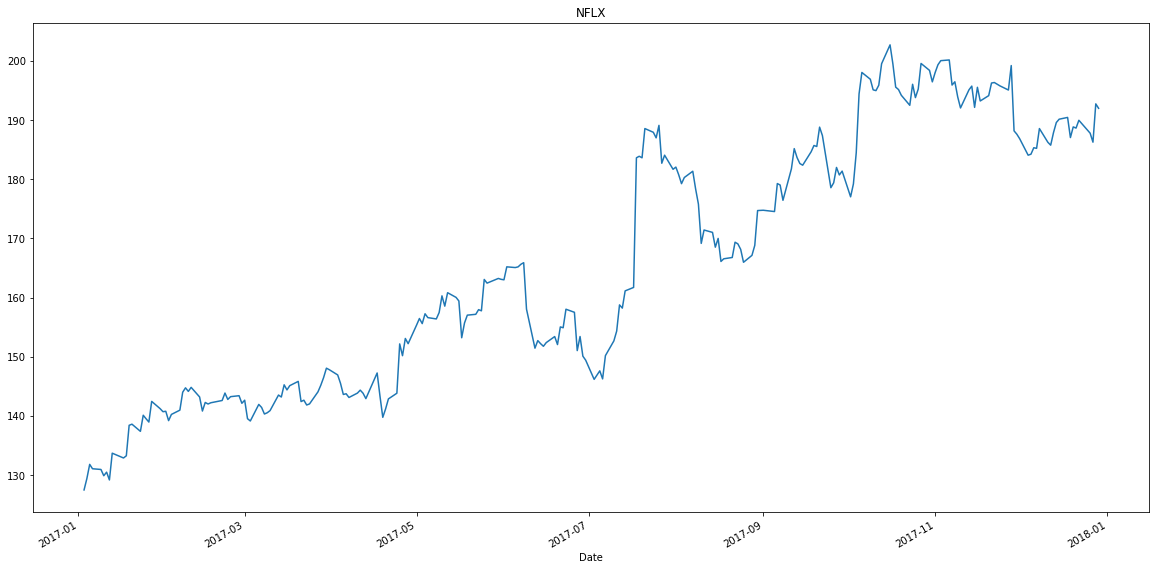

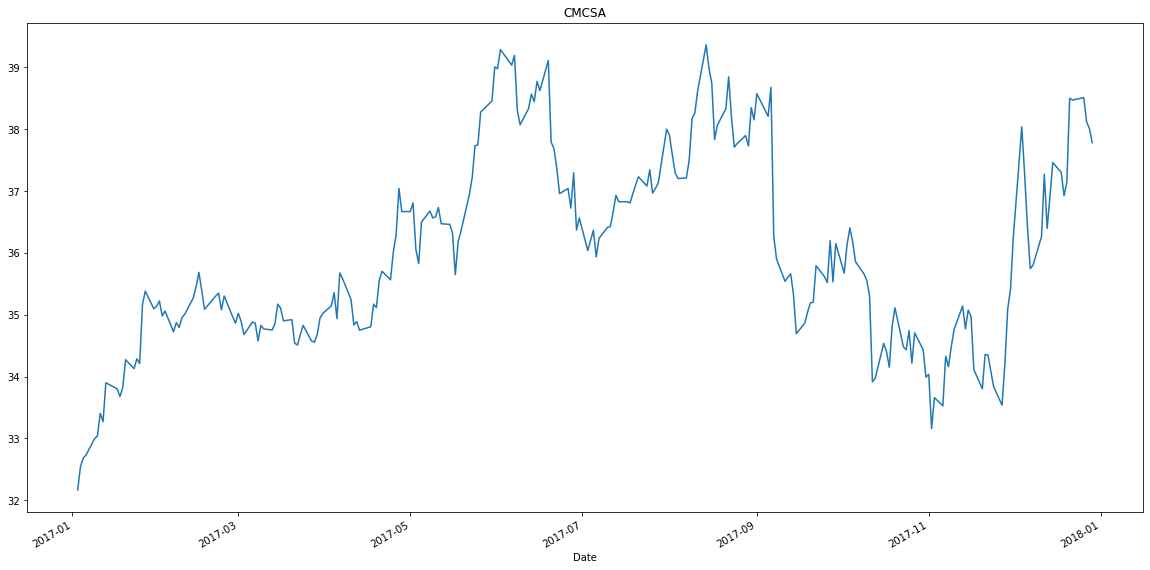

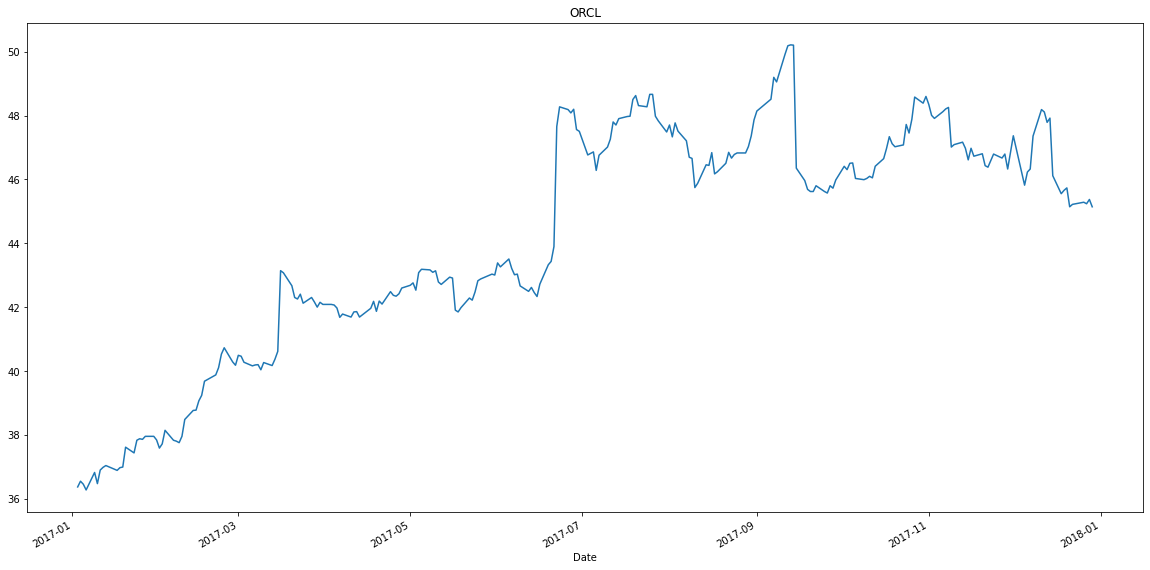

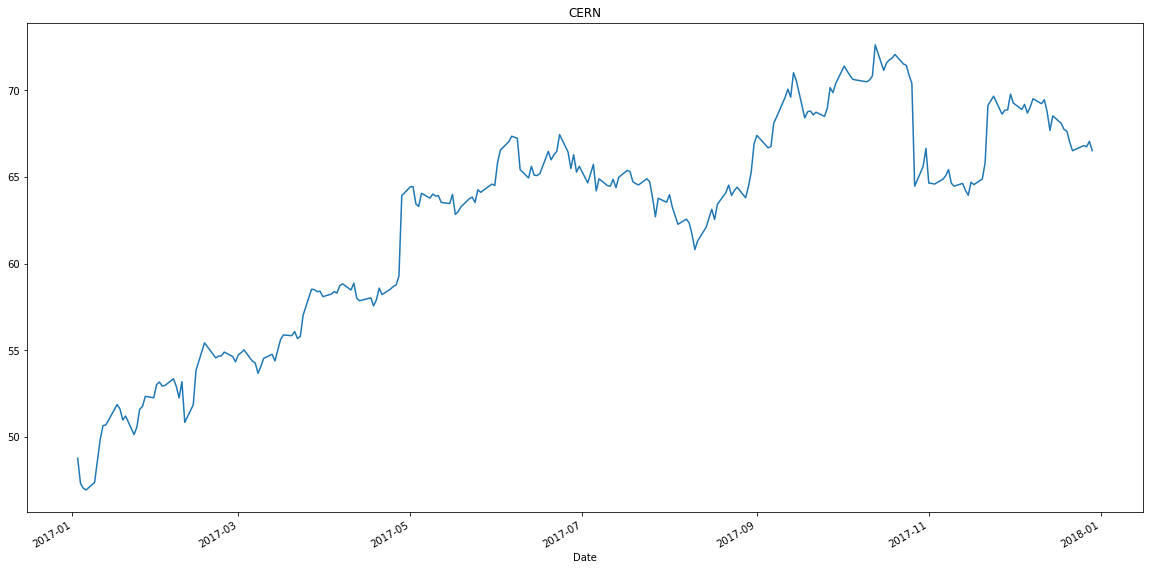

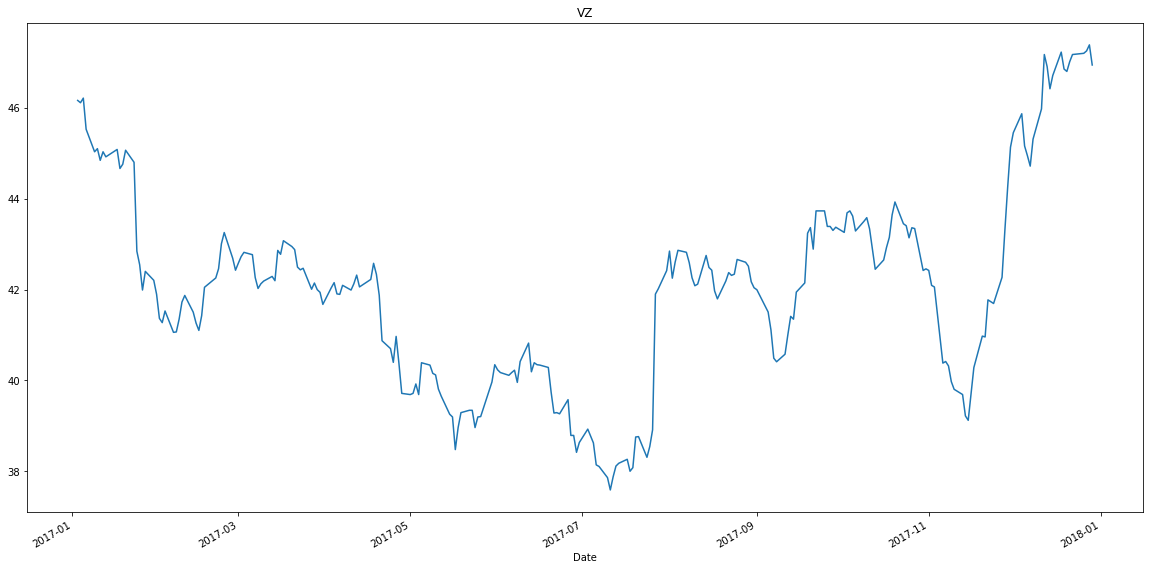

In [6]:
#basic plotting
for ticker in tickers:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.title(ticker)
    dataframes_dict[ticker]['Adj Close']['2017-01-01':'2017-12-31'].plot(ax=ax)


In [ ]:
#ploting OLS 


For Time Series Analysis we like the data to be stationary. Most stock data (as we will see) is not stationary but follows a Random Walk (with Drift). We will be checking to see if data is a Random Walk and if it is we will be converting it to make it weak-stationary (mean,variance,autocorrelations not time dependent) like White Noise which is stationary.

In [7]:
#Random Walk test: Dikcey-Fuller test. To test if series is a Random Walk. Null hypothesis is that series is a random walk
#and if p-value if less than .05 we can reject the null hypotheses that the series is a random walk with with 95% confidence
from statsmodels.tsa.stattools import adfuller
for ticker in tickers:
    adfuller_test = adfuller(dataframes_dict[ticker]['Adj Close']['2017-01-01':'2017-12-31'])
    #p-value
    print(ticker,'adfuller_test p-value is',adfuller_test[1])
    if adfuller_test[1] < .05:
        print(ticker,'95% confidence stationary')

AAPL adfuller_test p-value is 0.3210366319207346
MSFT adfuller_test p-value is 0.9493767745646526
AMZN adfuller_test p-value is 0.7194591445269073
GOOG adfuller_test p-value is 0.7301247080886414
FB adfuller_test p-value is 0.26366169344922225
IBM adfuller_test p-value is 0.6702496661966206
DIS adfuller_test p-value is 0.4437274907487811
NFLX adfuller_test p-value is 0.5526354163116555
CMCSA adfuller_test p-value is 0.06016776910329916
ORCL adfuller_test p-value is 0.2155061107542266
CERN adfuller_test p-value is 0.23294913090078656
VZ adfuller_test p-value is 0.2101339139567483


AAPL 95% confidence stationary
MSFT 95% confidence stationary
AMZN 95% confidence stationary
GOOG 95% confidence stationary
FB 95% confidence stationary
IBM 95% confidence stationary
DIS 95% confidence stationary
NFLX 95% confidence stationary
CMCSA 95% confidence stationary
ORCL 95% confidence stationary
CERN 95% confidence stationary
VZ 95% confidence stationary


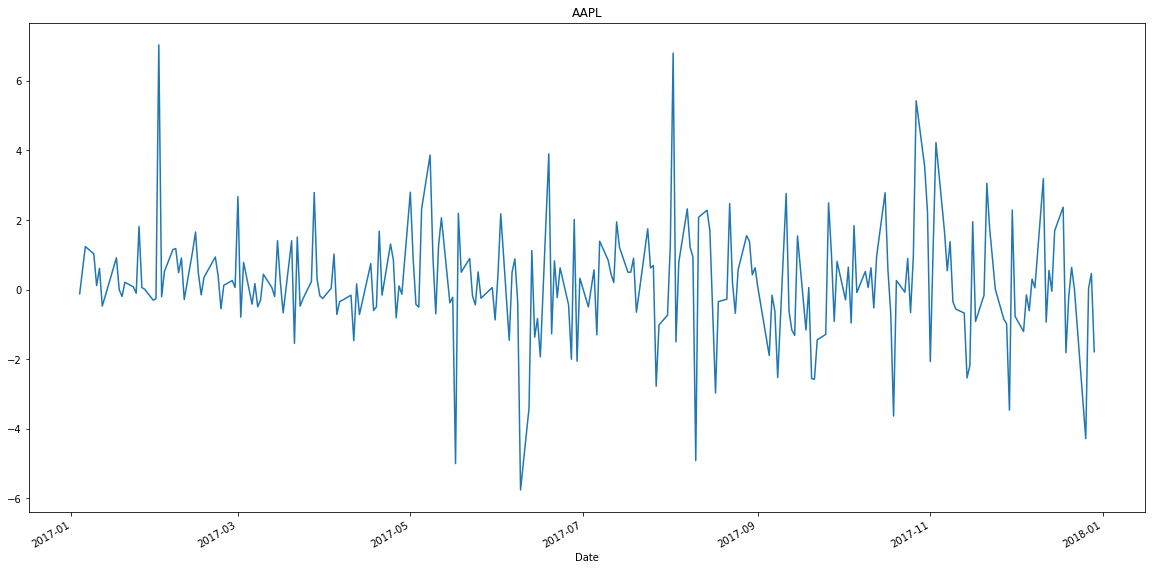

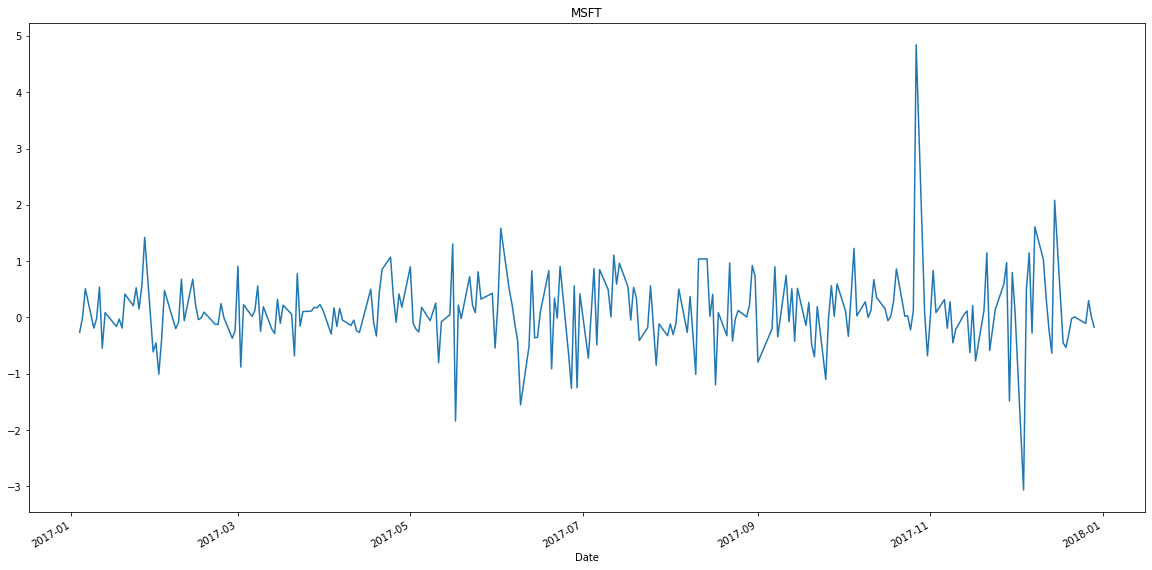

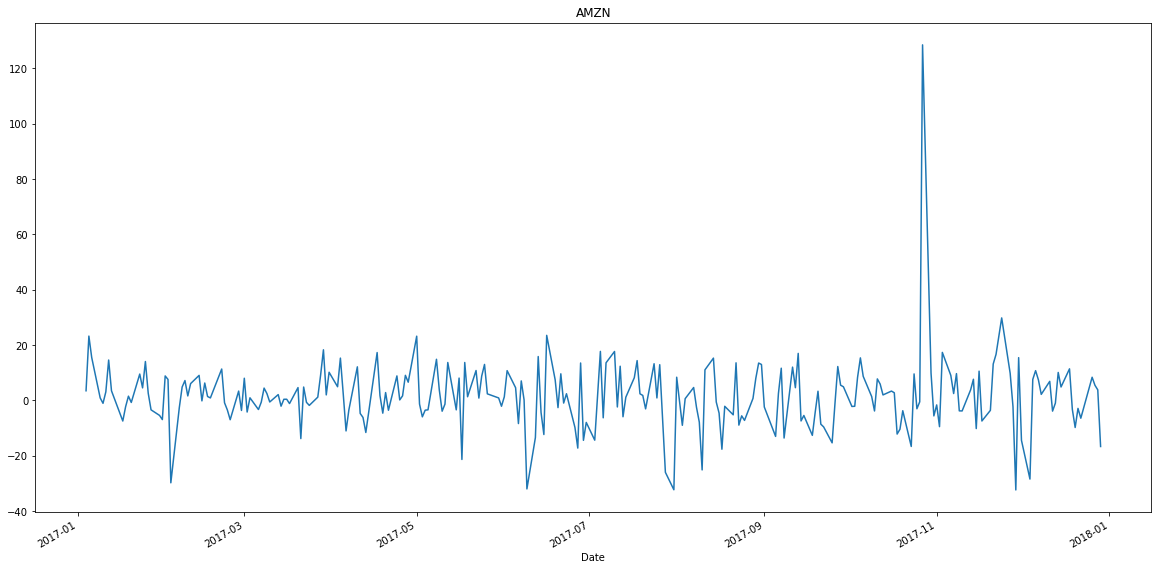

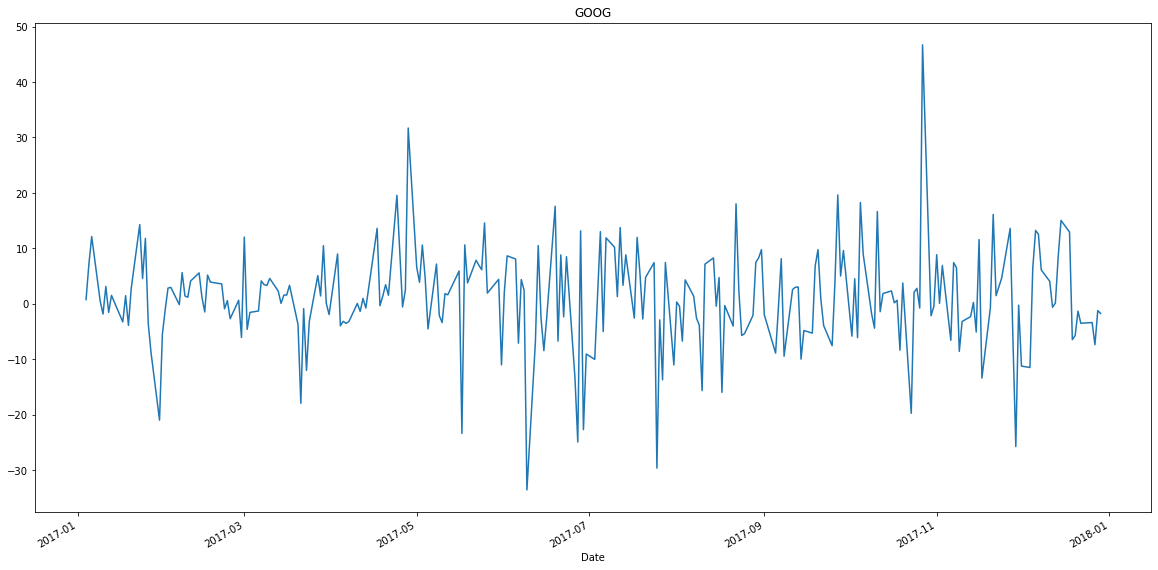

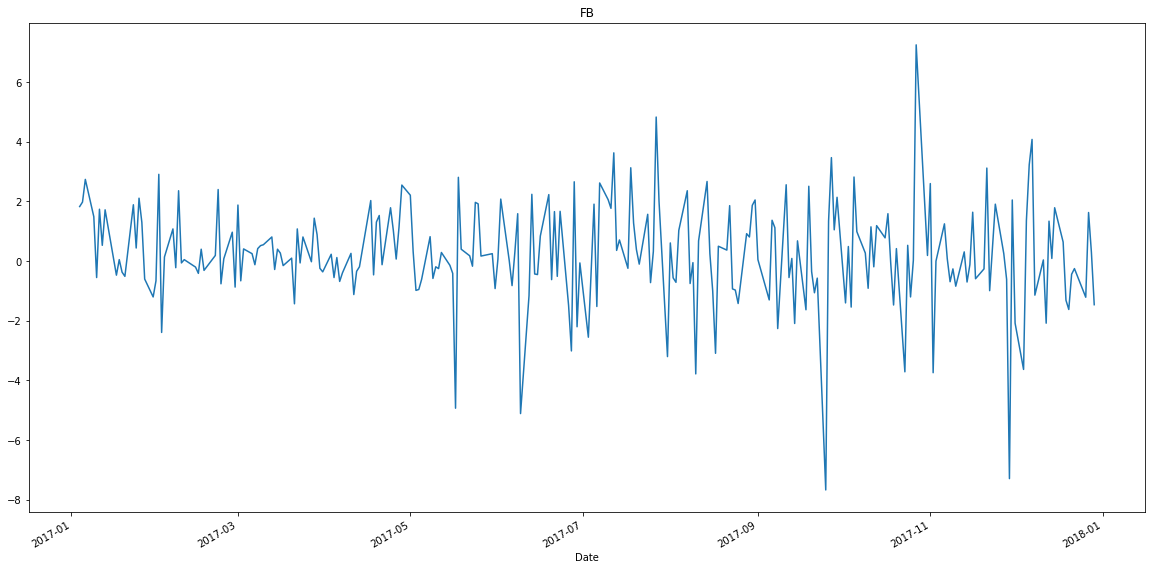

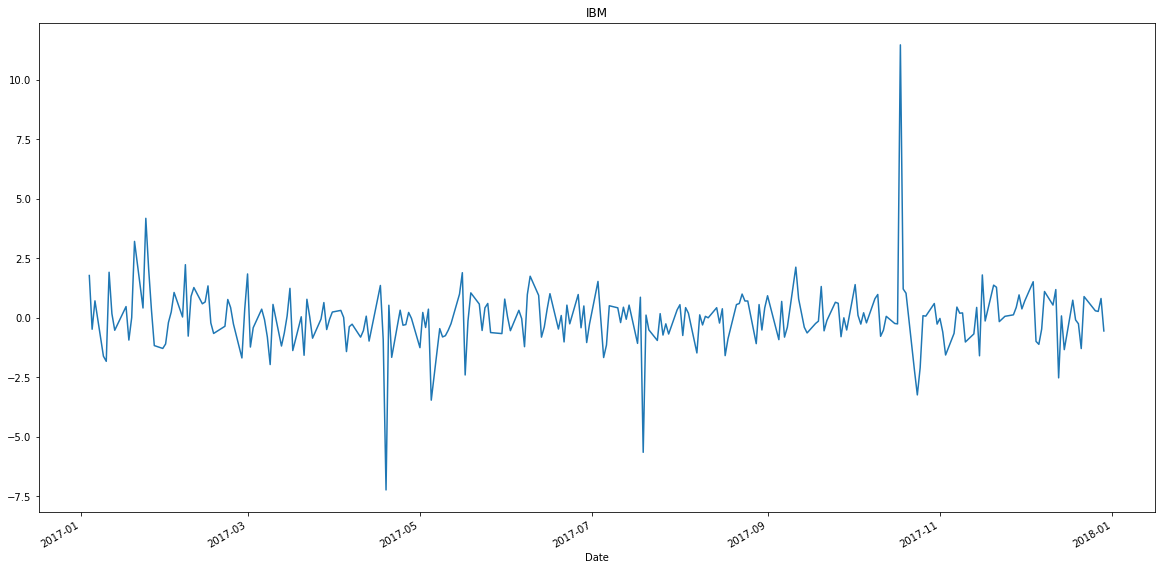

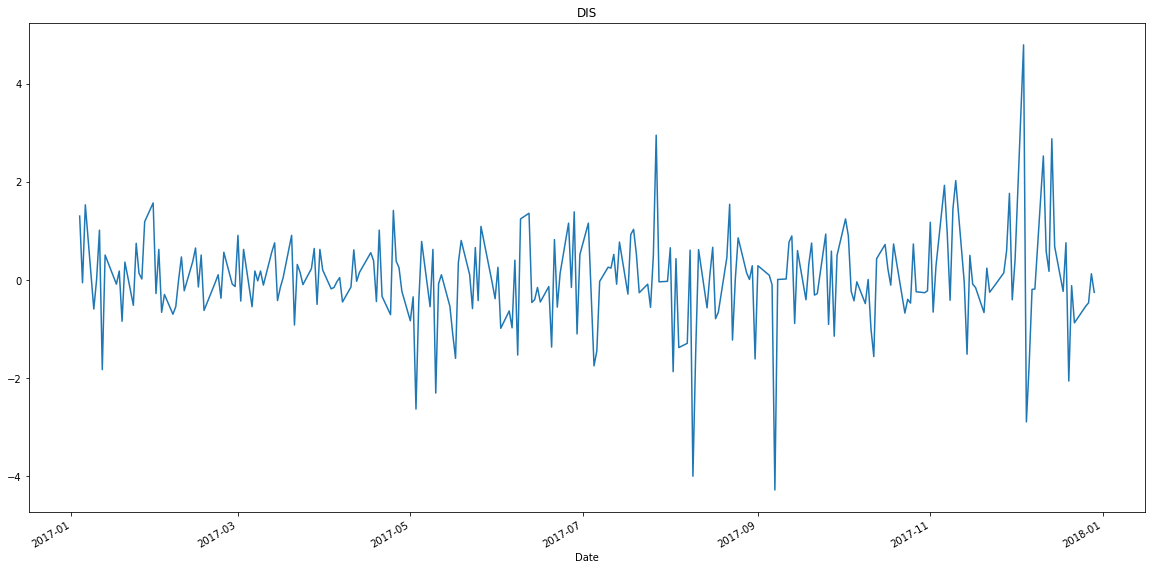

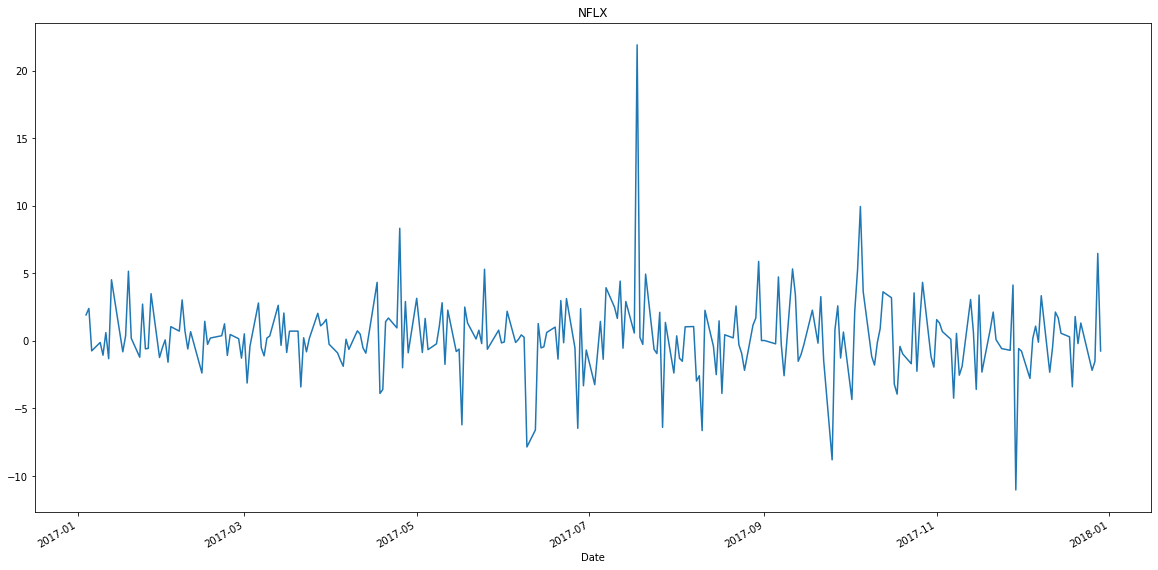

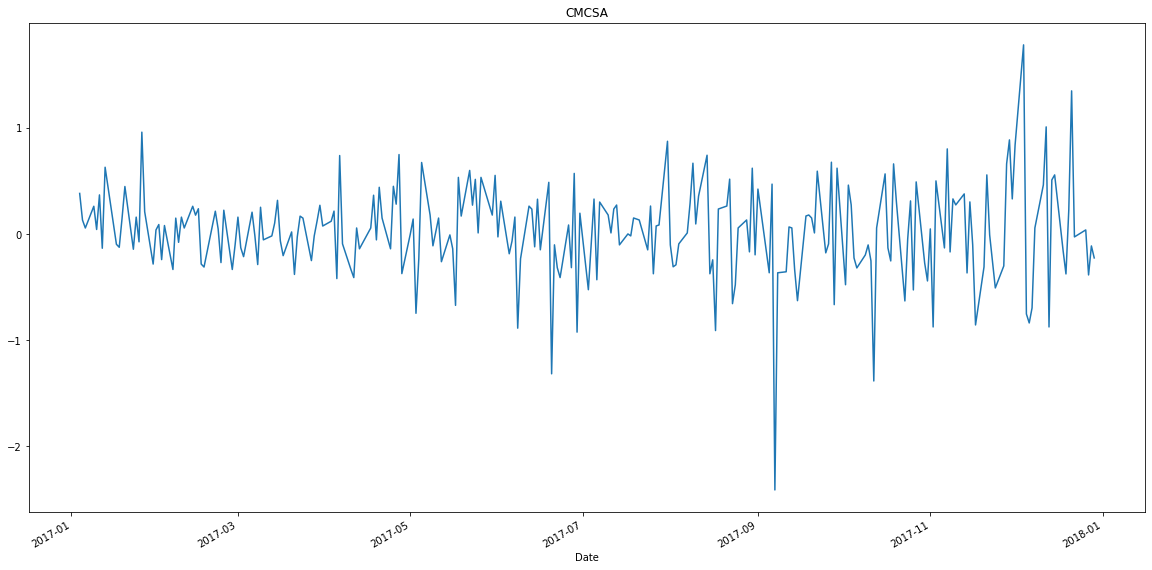

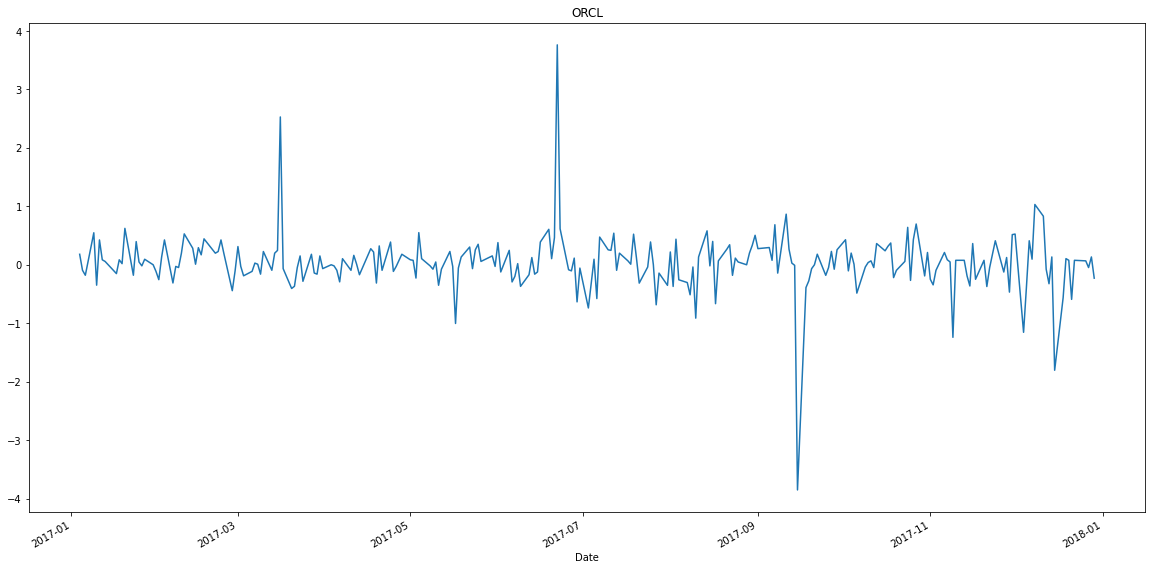

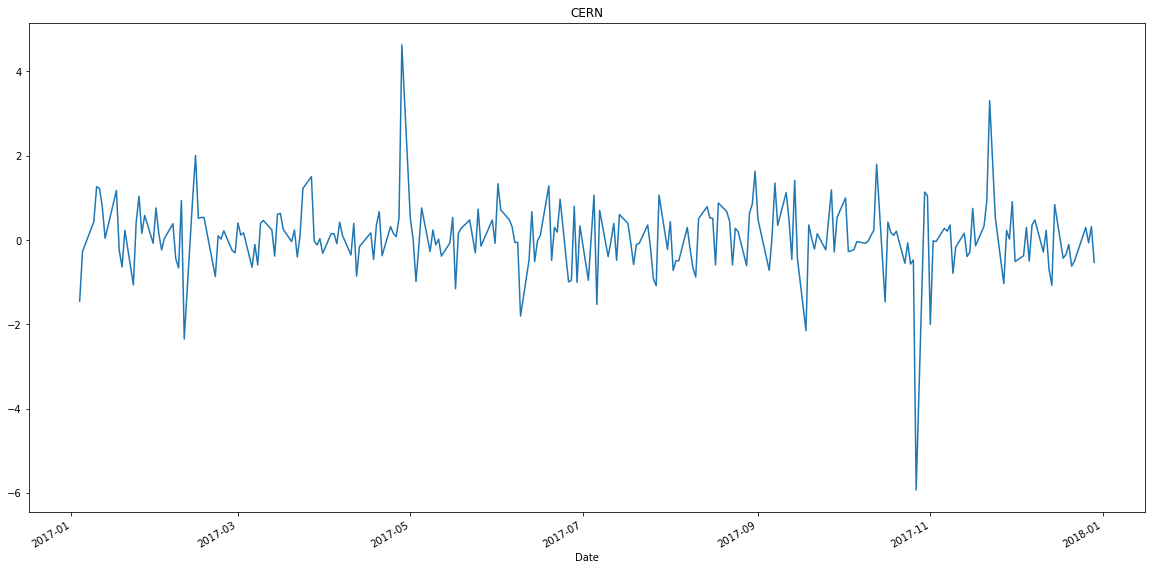

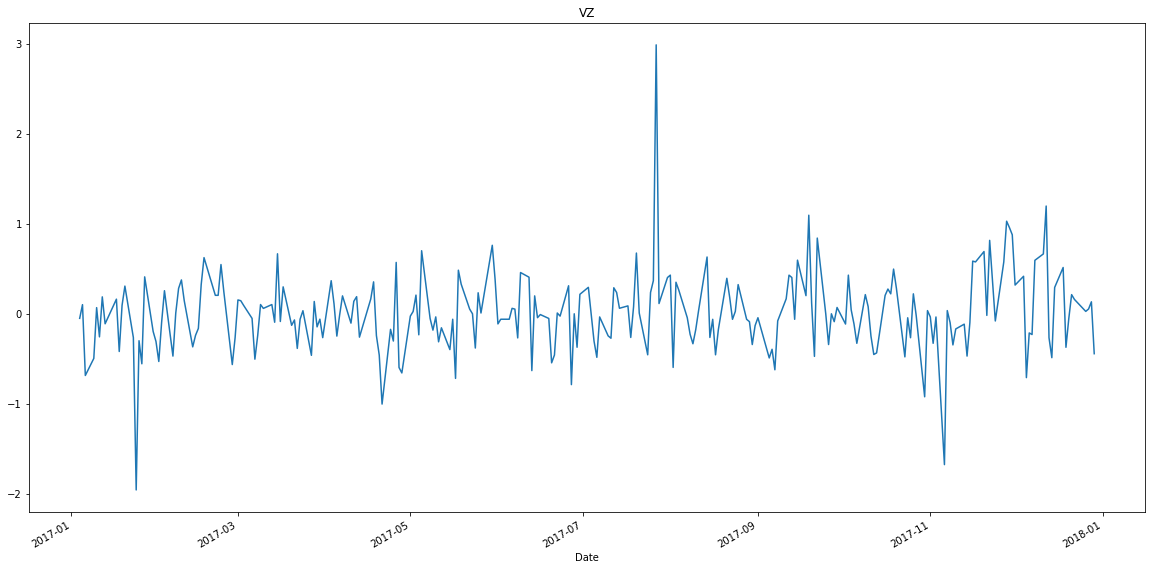

In [8]:
#A good way to make data stationary is to take the first or second differences. In the SARIMAX model this will be done automatically
#as part of the function but we will show the graphs for stationary here. 
for ticker in tickers:
    adfuller_test = adfuller(dataframes_dict[ticker]['Adj Close']['2017-01-01':'2017-12-31'].diff().dropna())
    #p-value
    if adfuller_test[1] < .05:
        print(ticker,'95% confidence stationary')
    else:
        print(ticker,'Still not stationary')
        
for ticker in tickers:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.title(ticker)
    dataframes_dict[ticker]['Adj Close']['2017-01-01':'2017-12-31'].diff().dropna().plot(ax=ax)        


Using the ACF and PACF we can choose a model order and determine the seasonal trend.
*	If the amplitude of the ACF tails off as lags increase and the PACF cuts off after some lag (p), then we have an AR p model. Meaning AR p will be the maximum goodness of the ARIMA.
*	If the amplitude of the ACF cuts off after some lag (q) and the PACF tails off, then we have a MA q model. (Tailing off is allowed to switch positive and negative as long as decreasing). Meaning the MA q will be the maximum goodness of the ARIMA. 
*	If both the ACF and the PACF tail off then we have an ARMA model and we can’t deduce the model orders of p and q. 
*	The ACF and PCAF plots need to be performed on stationary data!
*	If the Autocorrelation at lag-1 is very negative it’s a sign that we have taken the difference too many times. 

The ACF point that sticks out the most is usually the seasonal trend

**We will now start with AAPL stock**

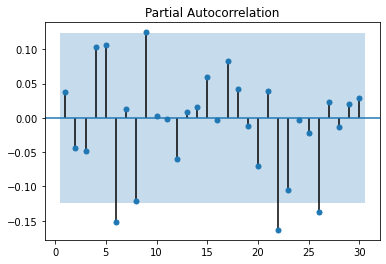

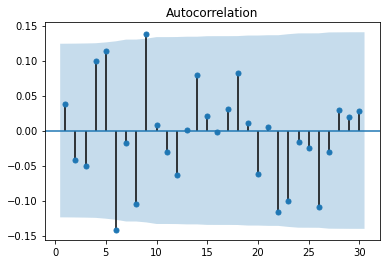

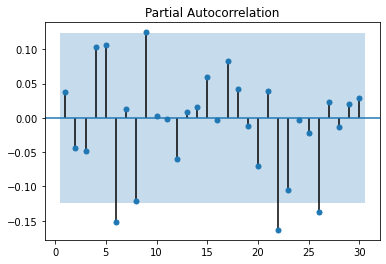

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dataframes_dict['AAPL']['Adj Close']['2017-01-01':'2017-12-31'].diff().dropna(),lags=30,alpha=.05,zero=False)
plot_pacf(dataframes_dict['AAPL']['Adj Close']['2017-01-01':'2017-12-31'].diff().dropna(),lags=30,alpha=.05,zero=False)

The ACF and PACF almost mirror eachother and we won't be able to determine a good AR or MA from them.
We also don't have a good indication on the seasonal trend, but we will use 9 (the high point) for plotting.

We will check the best AR, MA, Difference, and seasonal order using the AIC metric but before that we are going to explore the seasonality of the data.

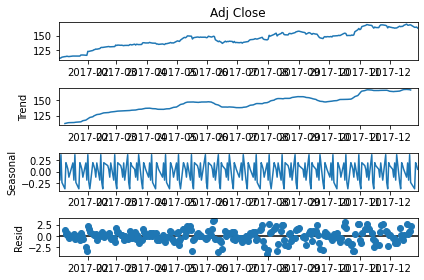

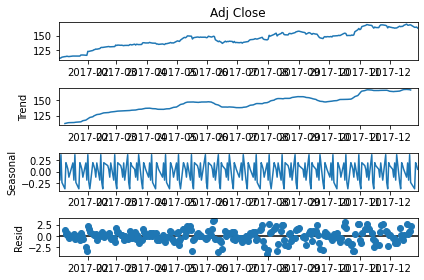

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(dataframes_dict['AAPL']['Adj Close']['2017-01-01':'2017-12-31'], period=9, model='additive')
decomp_results.plot()

There is a handy library called pmdarima which is fantastic at returning the best SARIMAX parameters. We will run one without a seasonal trend and one with a seasonal trend of 9 to see which set performs best using the aic as our guiding metric.  

Our desire is that both of the null hypothesies stand.
*   Prob(Q): is the p-value for null hypotheses that the residuals have no correlation.
*    Prob(JB): is the p-value for null hypotheseis that residulas are normal distriubuted. 

In [15]:
import pmdarima as pm

In [16]:
model_aapl_s =  pm.auto_arima(dataframes_dict['AAPL']['Adj Close']['2017-01-01':'2017-12-31'],information_criterion='aic',seasonal=True,m=9,d=1,max_D=30,stepwise=False)

In [18]:
model_aapl_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                -471.529
Date:                           Sun, 15 Aug 2021   AIC                            949.058
Time:                                   01:05:13   BIC                            959.622
Sample:                                        0   HQIC                           953.309
                                           - 251                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1795      0.101      1.769      0.077      -0.019       0.378
ar.S.L9        0.1414      0.080      1.765      0.077      -0.016       0.298
sigma2         2.5437      0.142     17.925      0.000       2.266       2.822
===================================================================================
Ljung-Box (Q):                       51.13   Jarque-Bera (JB):               119.04
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model_aapl =  pm.auto_arima(dataframes_dict['AAPL']['Adj Close']['2017-01-01':'2017-12-31'],information_criterion='aic',stepwise=False)

In [19]:
model_aapl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -469.492
Date:                Sun, 15 Aug 2021   AIC                            950.984
Time:                        01:05:13   BIC                            972.112
Sample:                             0   HQIC                           959.487
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3072      0.141      2.178      0.029       0.031       0.584
ar.L1          0.5234      0.035     14.760      0.000       0.454       0.593
ar.L2         -0.9712      0.036    -26.783      0.000      -1.042      -0.900
ma.L1         -0.5408      0.056     -9.672      0.000      -0.650      -0.431
ma.L2          0.9374      0.053     17.601      0.000       0.833       1.042
sigma2         2.4996      0.141     17.668      0.000       2.222       2.777
===================================================================================
Ljung-Box (Q):                       44.79   Jarque-Bera (JB):               125.74
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Using a seasonal period of 9 returned a model SARIMAX(0, 1, 0)x(1, 0, 0, 9) with an aic of 949.058.
Using no seasonal periods returned a model of SARIMAX(2, 1, 2) with an aic of 950.984.

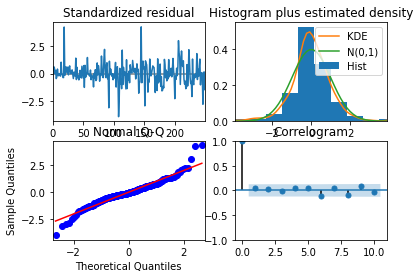

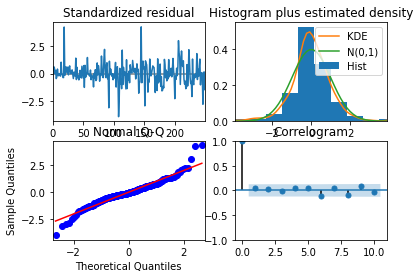

In [20]:
model_aapl.plot_diagnostics()

Performing metrics on the model will tell us how well the model is compared to the original data. The MAE of the resdiuals will tell us how far our predictions are the the true values. A well fit model will have the resdiuals centered arround 0.

In [21]:
residuals = model_aapl.resid()

In [22]:
np.mean(np.abs(residuals))

1.5531347195583234

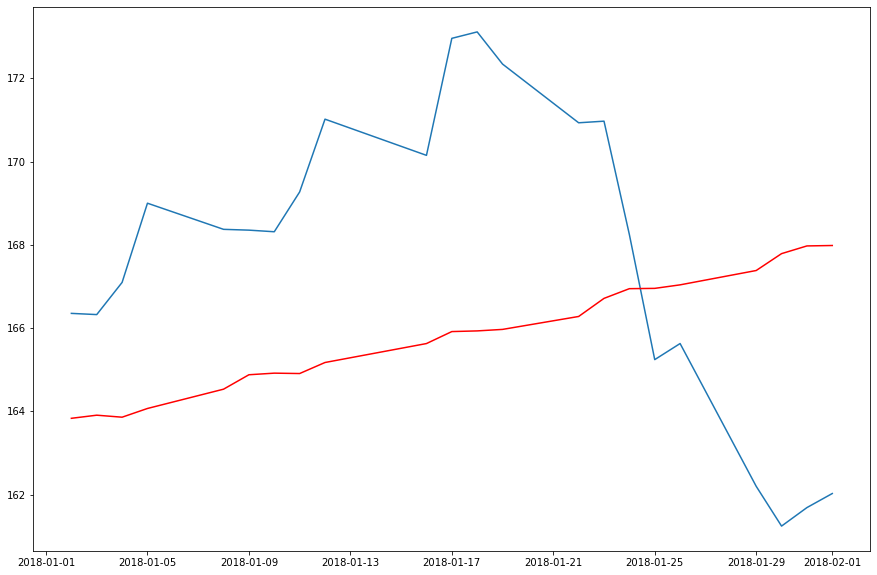

In [27]:
plt.figure(figsize=(15,10))
plt.plot(dataframes_dict['AAPL']['Adj Close']['2018-01-01':'2018-02-01'])
plt.plot(dataframes_dict['AAPL']['Adj Close']['2018-01-01':'2018-02-01'].index,model_aapl.predict(n_periods=22),color='red')

In [ ]:
'''
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model = SARIMAX(dataframes_dict['AAPL']['Adj Close'],order=(2,1,2),seasonal_order=(1,0,0,9))
results = model.fit()
residuals = results.resid
'''